# AI - GLOBAL VARIABLES LOVERS

# IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

# LOADING DATASET

In [2]:
df = pd.read_csv("final_train.csv")

In [3]:
df

,Unnamed: 0,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,11081,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,3.534816,-0.544652,2.0
11082,11082,LAYING,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,...,5.048737,2.923856,5.182026,-0.998495,2.853755,-0.933561,-1.000173,-1.984575,1.372763,1.0
11083,11083,WALKING_UPSTAIRS,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,...,4.453514,4.302852,2.979961,-6.032382,1.853029,-0.802817,0.041975,3.427548,-0.075184,1.0
11084,11084,WALKING_DOWNSTAIRS,-1.574768,-0.752847,-2.449529,-1.737755,-0.189761,-0.454246,8.054443,-5.611277,...,4.615939,4.443277,3.208597,-6.200222,1.675269,-0.828934,-0.877004,3.385405,-0.383217,3.0


List of all the columns:

In [4]:
#list(df.columns)

# CLEANING DATASET

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)

In [6]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


In [7]:
df.dropna(inplace = True)

In [8]:
df = df.reset_index()

In [9]:
df.head()

,index,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,5,SITTING,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0


In [10]:
df.drop(df.columns[0], axis=1, inplace=True)

In [11]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,SITTING,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,3.611319,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0


In [12]:
df.Activity[df.Activity == 'STANDING'] = 0
df.Activity[df.Activity == 'WALKING_UPSTAIRS'] = 1
df.Activity[df.Activity == 'LAYING'] = 2
df.Activity[df.Activity == 'SITTING'] = 3
df.Activity[df.Activity == 'WALKING'] = 4
df.Activity[df.Activity == 'WALKING_DOWNSTAIRS'] = 5

<ipython-input-12-2d9e1ecdba1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Activity[df.Activity == 'STANDING'] = 0
<ipython-input-12-2d9e1ecdba1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Activity[df.Activity == 'WALKING_UPSTAIRS'] = 1
<ipython-input-12-2d9e1ecdba1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Activity[df.Activity == 'LAYING'] = 2
<ipython-input-12-2d9e1ecdba1d>:4: SettingWithCopyWarning: 
A

In [13]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,4,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,3,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,3.611319,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0


In [14]:
df.tail()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
9619,5,-1.575492,-0.614487,-2.452436,-1.732651,-0.418138,1.768320,5.163003,-4.868354,0.507122,...,4.044203,4.604386,2.021879,-3.945744,1.298908,-0.769566,-0.737230,-1.986261,-1.792696,1.0
9620,1,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,3.534816,-0.544652,2.0
9621,2,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,3.603169,...,5.048737,2.923856,5.182026,-0.998495,2.853755,-0.933561,-1.000173,-1.984575,1.372763,1.0
9622,1,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,2.644861,...,4.453514,4.302852,2.979961,-6.032382,1.853029,-0.802817,0.041975,3.427548,-0.075184,1.0
9623,4,-1.573186,-0.584008,-2.469062,-1.770029,-0.589358,-1.695744,7.306605,-11.917694,2.972936,...,4.734942,4.304923,3.757613,-2.112537,2.081746,-0.843569,-0.423656,1.397488,0.244843,1.0


# MODEL

In [15]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [16]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [17]:
y=df.Activity
X=df.drop('Activity',axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Columns: 572 entries, Activity to void()
dtypes: float64(570), int64(1), object(1)
memory usage: 42.0+ MB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [20]:
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='accuracy', patience=3)

Dense layer is the regular deeply connected neural network layer.

Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

In [21]:
model = Sequential([
   
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(6, activation="softmax")

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [23]:
classifier = model.fit(X_train,
                       y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2,
                       callbacks=[stop_early])

Epoch 1/100
49/49 [==============================] - 2s 25ms/step - loss: 2.3292 - accuracy: 0.3492 - val_loss: 0.7224 - val_accuracy: 0.6708
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6994 - accuracy: 0.6742 - val_loss: 0.5055 - val_accuracy: 0.7825
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5243 - accuracy: 0.7741 - val_loss: 0.5241 - val_accuracy: 0.7526
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 0.4450 - accuracy: 0.8008 - val_loss: 0.2815 - val_accuracy: 0.8948
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.8493 - val_loss: 0.2597 - val_accuracy: 0.8942
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.8916 - val_loss: 0.2444 - val_accuracy: 0.8994
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.8806 - val_loss: 0.2098 - val_accuracy: 0.9201
Epoch 8/100


# TEST LOSS & TEST ACCURACY - LET'S PLOT IT


Accuracy on the test data:


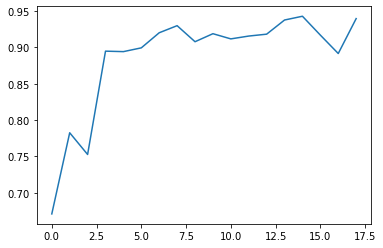

In [24]:
print('\nAccuracy on the test data:')
plt.plot(classifier.history['val_accuracy'])


Loss on the test data:


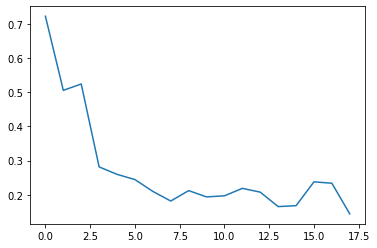

In [25]:
print('\nLoss on the test data:')
plt.plot(classifier.history['val_loss'])

In [26]:
model.save(r'C:\Users\karol\Documents\KOZMINSKI\2 rok\BHL hackathon.h5')

In [26]:
keras.models.save_model(model=model, filepath=r'C:\Users\karol\Documents\KOZMINSKI\2 rok\BHL hackathon\AI-Global_Variables_Lovers.h5', save_format='h5')